In [ ]:
%matplotlib inline


# partial dependence plot


In [1]:

import site
site.addsitedir("D:\\mytools\\AI4Water")

from ai4water import Model
from ai4water.datasets import busan_beach
from ai4water.utils.utils import get_version_info
from ai4water.postprocessing.explain import PartialDependencePlot


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [3]:
data = busan_beach()
input_features = data.columns.tolist()[0:-1]
output_features = data.columns.tolist()[-1:]

In [7]:

model = Model(model="XGBRegressor")



            building ML model for  
            regression problem using XGBRegressor


In [8]:
# train model

rgr = model.fit(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)


In [9]:
# get data

x, _ = model.training_data()


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (121, 13)
target shape:  (121, 1)


In [10]:

# initiate plotter

pdp = PartialDependencePlot(model.predict,
                            x,
                            model.input_features,
                            save=False,
                            num_points=14)


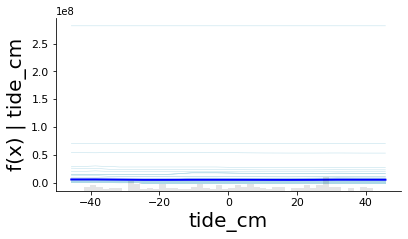

In [11]:

_ = pdp.plot_1d("tide_cm")

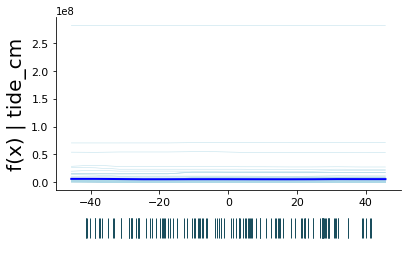

In [12]:
_ = pdp.plot_1d("tide_cm", show_dist_as="grid")

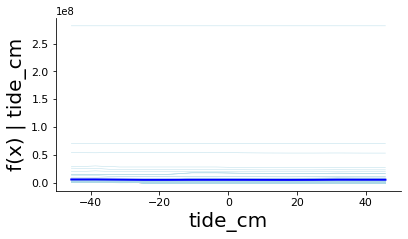

In [13]:
_ = pdp.plot_1d("tide_cm", show_dist=False)

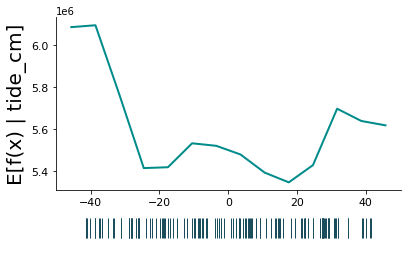

In [17]:
_ = pdp.plot_1d("tide_cm", show_dist_as="grid", ice=False, pdp_line_kws={'color': 'darkcyan'})

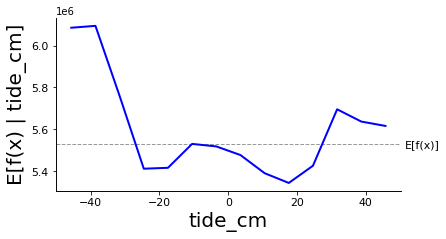

In [15]:
_ = pdp.plot_1d("tide_cm", show_dist=False, ice=False,
            model_expected_value=True)

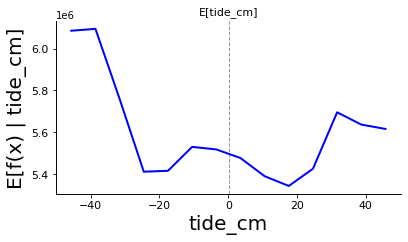

In [16]:
_ = pdp.plot_1d("tide_cm", show_dist=False, ice=False,
            feature_expected_value=True)